# PlotGraphviz.jl

- `PlotGraphviz.jl` tries to unleash the power of **Graphviz** in your IJulia environment. It is using [`ShowGraphviz.jl`](https://github.com/tkf/ShowGraphviz.jl), which derive various show methods from text/vnd.graphviz (https://graphviz.org). To parse dot files it uses [`ParserCombinator.jl`](https://github.com/andrewcooke/ParserCombinator.jl/blob/master/src/dot/DOT.jl).

- `PlotGraphviz.jl` present a simple interface for (nearly) all features of Graphviz. 

- `PlotGraphviz.jl` accepts graphs from [`SimpleWeightedGraphs.jl`](https://github.com/JuliaGraphs/SimpleWeightedGraphs.jl)

## How to use it

In [1]:
using Pkg
Pkg.activate(".")
# using Revise
using Graphs, SimpleWeightedGraphs

  Activating project at `~/Documents/Programmierung/Julia/08_Projects/PlotGraphviz`


Generate some Graphs by importing `Graphs.jl` and `SimpleWeightedGraphs.jl`:

In [2]:
using PlotGraphviz

┌ Info: Precompiling PlotGraphviz [78a92bc3-407c-4e2f-aae5-75bb47a6fe36]
└ @ Base loading.jl:1423


`SimpleWeightedGraphs.jl` are directly supported:

In [8]:
g = SimpleWeightedGraph(3)  # or use `SimpleWeightedDiGraph` for directed graphs
SimpleWeightedGraphs.add_edge!(g, 1, 2, 0.5)
SimpleWeightedGraphs.add_edge!(g, 2, 3, 0.8)
SimpleWeightedGraphs.add_edge!(g, 1, 3, 2.0);

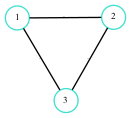

In [9]:
plot_graphviz(g)

Or use generators from `Graphs.jl`:

In [5]:
grid = Graphs.grid([10,5])

{50, 85} undirected simple Int64 graph

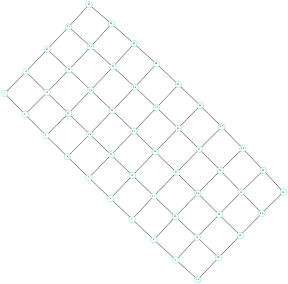

In [6]:
plot_graphviz(SimpleWeightedGraph(grid))

## Importing and modifying graphs

First let us import a standard example, and use function `read_dot_file` (more with `?` function)

In [84]:
mk, attrs = read_dot_file("./test/data/directed/clust4.gv");

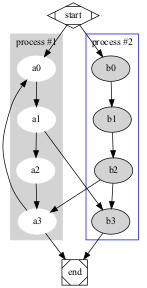

In [85]:
plot_graphviz(mk, attrs)

The value $attrs$ is a struct, that stores the GraphvizAttributes of the imported graph (as defined in "*.dot" file)

There are mainly 3 different Graph options available in Graphviz (see website for more):
- graph_options: attributes/properties, which belongs to complete graph (i.e. rankdir, label, ...)
- node_options: attributes/properties to modify all nodes
- edge_options: attributes/properties to modify all edges

For example to modify the shape of the nodes, we use the `set!` function to modify the properties:

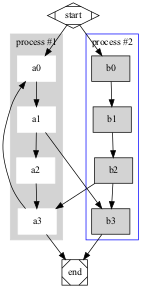

In [86]:
set!(attrs.node_options, Property("shape","box"));
plot_graphviz(mk, attrs)

Or to change the orientation and i.e. the edge color:

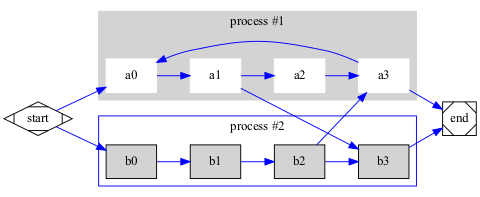

In [87]:
set!(attrs.graph_options, Property("rankdir","LR"));
set!(attrs.edge_options, Property("color","blue"));
plot_graphviz(mk, attrs; scale = 5)

To modify a single node, we need to access the node by its $name (String)$ or its $id (Int)$:

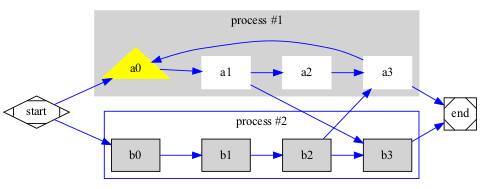

In [88]:
set!(attrs.nodes, "a0", Property("shape","triangle"))
set!(attrs.nodes, "a0", Property("filled","true"))
set!(attrs.nodes, "a0", Property("color","yellow"))
plot_graphviz(mk, attrs; scale = 5)

To access a single edge, we have to know the defined $id$.

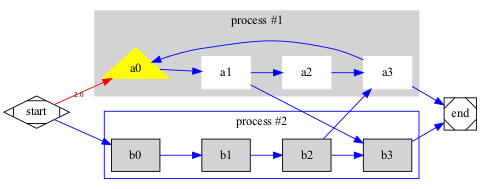

In [89]:
id_a0 = get_id(attrs.nodes,"start");
id_a1 = get_id(attrs.nodes,"a0");

set!(attrs.edges,id_a0, id_a1, Property("color","red"))
set!(attrs.edges,id_a0, id_a1, Property("xlabel","2.0"))
set!(attrs.edges,id_a0, id_a1, Property("fontsize","8.0"))
plot_graphviz(mk, attrs; scale = 5)

The imported graph $mk, attrs$ consists two subgraphs (of type cluster - see Graphviz). To get access to their attributes we need to change the cluster itself. 

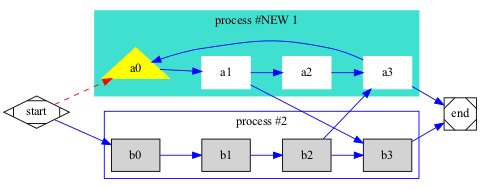

In [69]:
set!(attrs.subgraphs[1].graph_options, Property("color","Turquoise"));
set!(attrs.subgraphs[1].graph_options, Property("label","process #NEW 1"));
plot_graphviz(mk, attrs; scale = 5)

It is not possible to access a node or edge inside a cluster, you need to manipulate it directly:

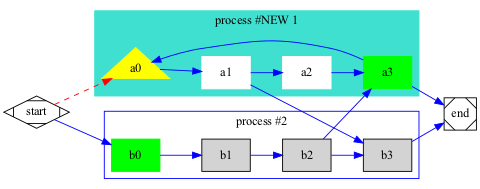

In [75]:
set!(attrs.subgraphs[2].nodes, "b0", Property("color","green")); ## does not work inside a cluster!
set!(attrs.nodes, "b0", Property("color","green")); ## but this works!
plot_graphviz(mk, attrs; scale = 5)

To write and store the graph use `write_dot_file` function:


In [82]:
write_dot_file(mk,"./test.dot"; attributes=attrs);

## Default Attributes:

Back to graph $g$. How to get the Graphviz attributes of this graph? There are two ways:
1. call an empty constuctor: attrs = GraphivzAttributes()
2. call the contructor with our graph $g$: attrs = GraphivzAttributes(g::AbstractSimpleWeightedGraph)

The second call generates the default plotting parameter used to represent the graph using `plot_graphviz()`

In [76]:
attrs = GraphvizAttributes(g)

GraphvizAttributes(Property[Property{String}("weights", "false"), Property{String}("largenet", "200")], Property[Property{String}("center", "\"1,1\""), Property{String}("overlap", "scale"), Property{String}("concentrate", "true"), Property{String}("layout", "neato"), Property{String}("size", "3.0")], Property[Property{String}("color", "Turquoise"), Property{String}("fontsize", "7.0"), Property{String}("width", "0.25"), Property{String}("height", "0.25"), Property{String}("fixedsize", "true"), Property{String}("shape", "circle")], Property[Property{String}("arrowsize", "0.5"), Property{String}("arrowtype", "normal"), Property{String}("fontsize", "1.0")], PlotGraphviz.gvSubGraph[], gvNode[gvNode(1, "1", Property[]), gvNode(2, "2", Property[]), gvNode(3, "3", Property[])], gvEdge[gvEdge(1, 2, Property[Property{Float64}("xlabel", 0.5)]), gvEdge(1, 3, Property[Property{Float64}("xlabel", 2.0)]), gvEdge(2, 1, Property[Property{Float64}("xlabel", 0.5)]), gvEdge(2, 3, Property[Property{Float64

## Color and Path:

There a two special functions available.

#### Color the graph:

One typical problem in graph theory is to identity connected components and to color them:

In [96]:
g2,attrs2 = read_dot_file("./test/data/example.dot");

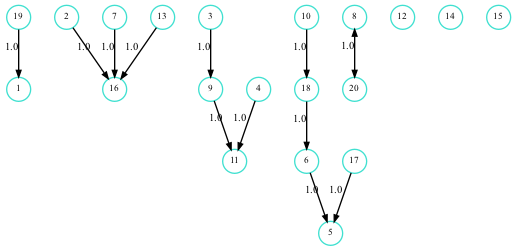

In [98]:
plot_graphviz(g2; edge_label=true, scale=6)

Use Graphs algorithm to indentify connected components:

In [99]:
L = Graphs.connected_components(g2)

8-element Vector{Vector{Int64}}:
 [1, 19]
 [2, 7, 13, 16]
 [3, 4, 9, 11]
 [5, 6, 10, 17, 18]
 [8, 20]
 [12]
 [14]
 [15]

Transform it to a vector for which each number represents the color of node:

In [101]:
color_vec = zeros(Int, 1, nv(g2))
color = 1
for components in L
    for idx in components
        color_vec[idx] = color
    end
    color = color + 1
end

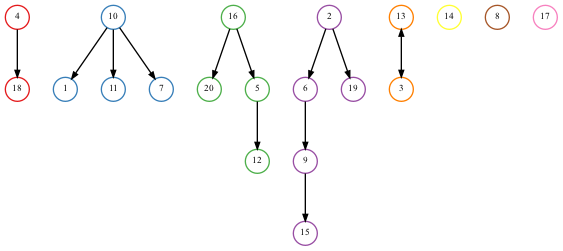

In [103]:
plot_graphviz(g2, attrs2; colors = color_vec, scale = 7)

#### Shortest path:

Import a small layered dag:

In [104]:
lydag, attrs = read_dot_file("./test/data/small_layered_dag.dot");

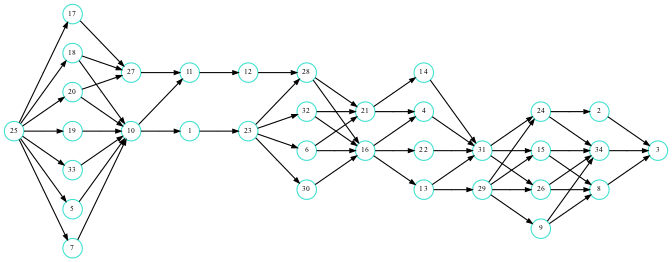

In [105]:
plot_graphviz(lydag; landscape = true, scale = 7)

To get the shortest path, we use Graphs.jl:

In [106]:
path = Graphs.dijkstra_shortest_paths(lydag, 3);

In [107]:
# convert precedessor list in path:
spath(ds, source, sink) = source == sink ? source : [spath(ds, ds.parents[source], sink) source];

And evaluate shortest path between **super-sink** and **super-source**:

In [108]:
L= spath(path, 25, 3)

1×12 Matrix{Int64}:
 3  34  26  31  22  16  28  12  11  27  20  25

Represent shortest path in graph:

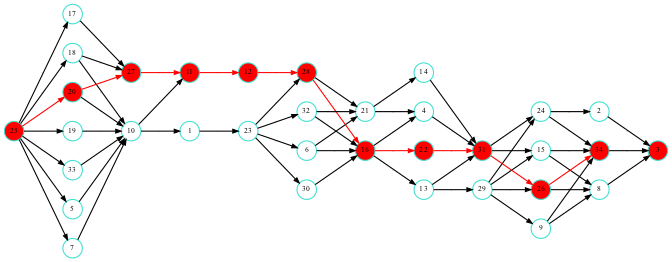

In [109]:
plot_graphviz(lydag; landscape = true, scale = 7, path = L)

## Comments

Open issues
- Not all test graphs are imported correcty.
- Performance issues has to be solved
- Design Patterns and Best Practices to be implemented.